# Init libraries and import zip file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

# magic function that renders the figure in a notebook
%matplotlib inline

In [3]:
zip_file = ZipFile('data/stack-overflow-2018-developer-survey.zip')

In [4]:
# survey_results_public.csv
#df = pd.read_csv(zip_file.open('survey_results_public.csv'),low_memory=False)
full_df = pd.read_csv(zip_file.open('survey_results_public.csv'))
full_df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# Reduced original data set for checking other variables

In [5]:
text_data_set = 'Country,CompanySize,CareerSatisfaction,Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,EducationTypes,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age'
reduced_data_columns = text_data_set.split(',')
print(reduced_data_columns)

['Country', 'CompanySize', 'CareerSatisfaction', 'Employment', 'FormalEducation', 'UndergradMajor', 'DevType', 'YearsCoding', 'YearsCodingProf', 'SalaryType', 'ConvertedSalary', 'EducationTypes', 'SelfTaughtTypes', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'OperatingSystem', 'Gender', 'SexualOrientation', 'RaceEthnicity', 'Age']


In [6]:
reduced_df = full_df[reduced_data_columns]

In [7]:
reduced_df.shape

(98855, 22)

In [8]:
reduced_df.dropna(inplace=True) # get rid of NaN data

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
reduced_df.shape

(13860, 22)

In [10]:
reduced_df.reset_index(inplace=True,drop=True) # fix the index and drop the old index values from being added as a column

In [11]:
reduced_df.shape

(13860, 22)

In [12]:
reduced_df.head()

,Country,CompanySize,CareerSatisfaction,Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,...,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age
0,United Kingdom,"10,000 or more employees",Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Yearly,...,The official documentation and/or standards fo...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,35 - 44 years old
1,United States,"10,000 or more employees",Moderately satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,Yearly,...,The official documentation and/or standards fo...,JavaScript;HTML;CSS,MongoDB,Linux,Node.js;React,MacOS,Male,Straight or heterosexual,White or of European descent,18 - 24 years old
2,United States,100 to 499 employees,Moderately satisfied,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,Yearly,...,The official documentation and/or standards fo...,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,Hadoop;Node.js;React;Spark,MacOS,Male,Straight or heterosexual,White or of European descent,35 - 44 years old
3,United Kingdom,20 to 99 employees,Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Back-end developer;Database administrator;Desi...,9-11 years,6-8 years,Monthly,...,Questions & answers on Stack Overflow,C#;JavaScript;PHP;SQL;HTML;CSS,MySQL,Linux;Mac OS;Windows Desktop or Server,.NET Core,Windows,Male,Straight or heterosexual,White or of European descent,25 - 34 years old
4,Poland,20 to 99 employees,Slightly satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Engineering manager,3-5 years,3-5 years,Monthly,...,The official documentation and/or standards fo...,Python;SQL;HTML;Bash/Shell,MongoDB;Redis;MySQL;PostgreSQL,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,25 - 34 years old


# Subset of the data that is only DevType and Country?

In [13]:
reduced_df['Country'].head()

0    United Kingdom
1     United States
2     United States
3    United Kingdom
4            Poland
Name: Country, dtype: object

In [14]:
reduced_df['DevType'].head()

0    Database administrator;DevOps specialist;Full-...
1    Back-end developer;Front-end developer;Full-st...
2    Back-end developer;C-suite executive (CEO, CTO...
3    Back-end developer;Database administrator;Desi...
4               Back-end developer;Engineering manager
Name: DevType, dtype: object

In [15]:
df_dev_country = reduced_df[['Country','DevType']]
df_dev_country.head()

,Country,DevType
0,United Kingdom,Database administrator;DevOps specialist;Full-...
1,United States,Back-end developer;Front-end developer;Full-st...
2,United States,"Back-end developer;C-suite executive (CEO, CTO..."
3,United Kingdom,Back-end developer;Database administrator;Desi...
4,Poland,Back-end developer;Engineering manager


In [16]:
#df['Country'].dtypes # dtype('O')

In [17]:
#df.DevType.dtype # dtype('O')

In [18]:
#df.Respondent.dtypes # dtype('int64')

# Split DevType into columns based on dummies

In [19]:
dt_dummies = pd.get_dummies(df_dev_country['DevType'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix="DevType").sum(level=0)
dt_dummies.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
3,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Concat the data

In [20]:
#smaller_data = pd.concat([emp_dummies,formal_dummies],axis=1,sort=False)
df_dc = pd.concat([reduced_df['Country'],dt_dummies],axis=1)
df_dc.head()

,Country,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,United Kingdom,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,United States,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,United States,1,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
3,United Kingdom,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,Poland,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# GroupBy

In [21]:
gb_df_dc = df_dc.groupby(df_dc['Country']).sum()
gb_df_dc.head(10)

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,
Albania,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Algeria,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Andorra,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,66.0,3.0,8.0,5.0,11.0,8.0,15.0,12.0,5.0,4.0,10.0,41.0,65.0,3.0,0.0,19.0,5.0,5.0,11.0,11.0
Armenia,9.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0
Australia,238.0,13.0,37.0,29.0,62.0,38.0,70.0,72.0,8.0,11.0,29.0,156.0,247.0,11.0,1.0,75.0,17.0,28.0,6.0,61.0
Austria,85.0,3.0,10.0,11.0,23.0,9.0,33.0,21.0,5.0,9.0,10.0,53.0,66.0,2.0,0.0,26.0,7.0,10.0,12.0,22.0
Azerbaijan,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bahrain,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0


# Heatmap

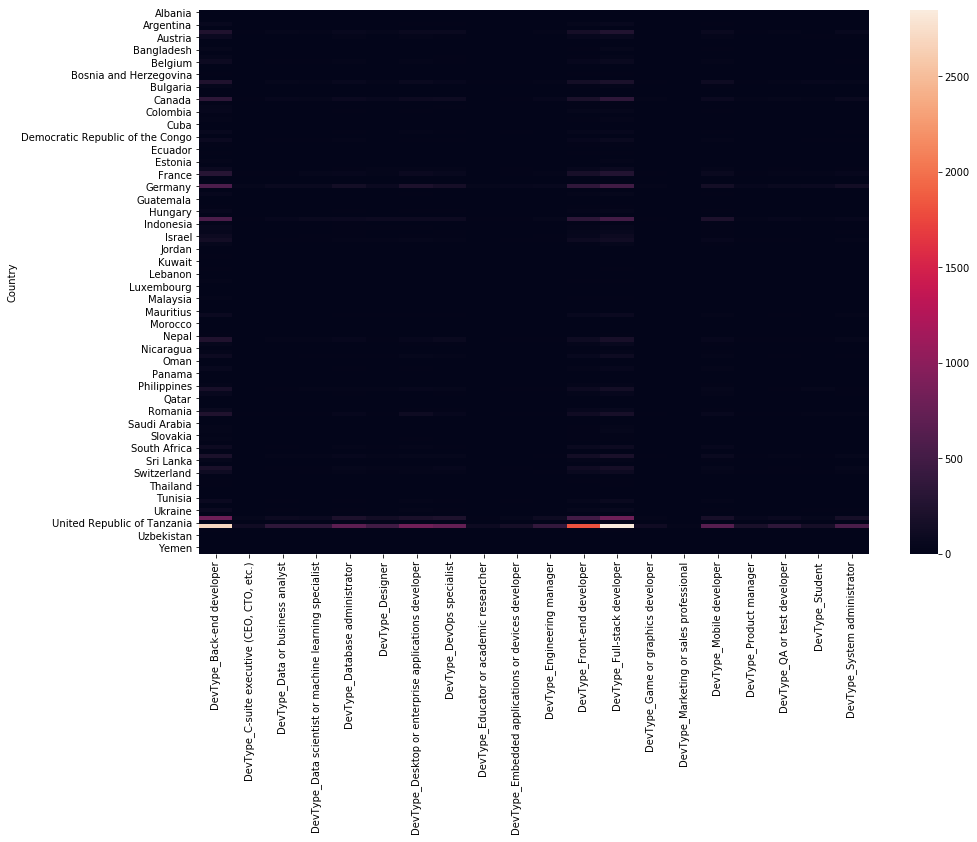

In [22]:
# fmt = String formatting code to use when adding annotations.

#sns.heatmap(df_dev_country, annot=True, fmt="d")
# TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc)

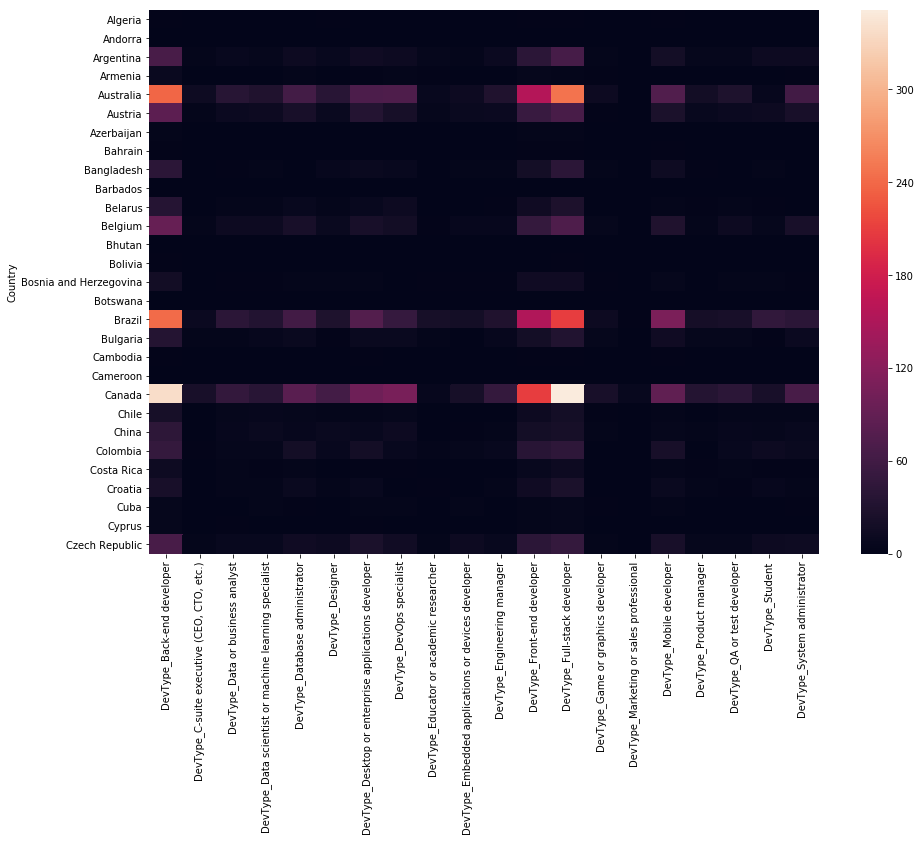

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc[1:30])

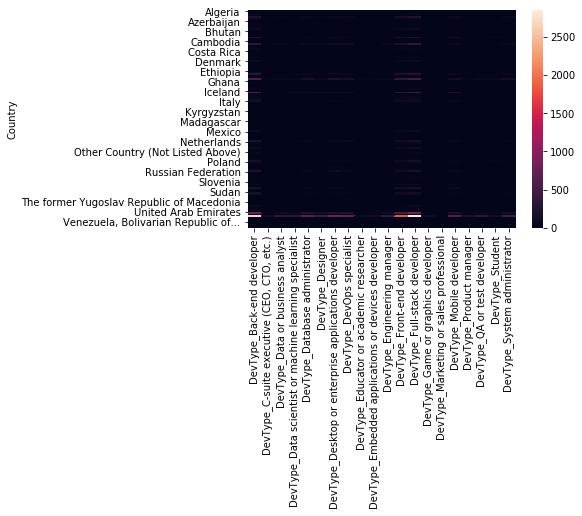

In [24]:
sns.heatmap(gb_df_dc[1:1000])

# Resize figures

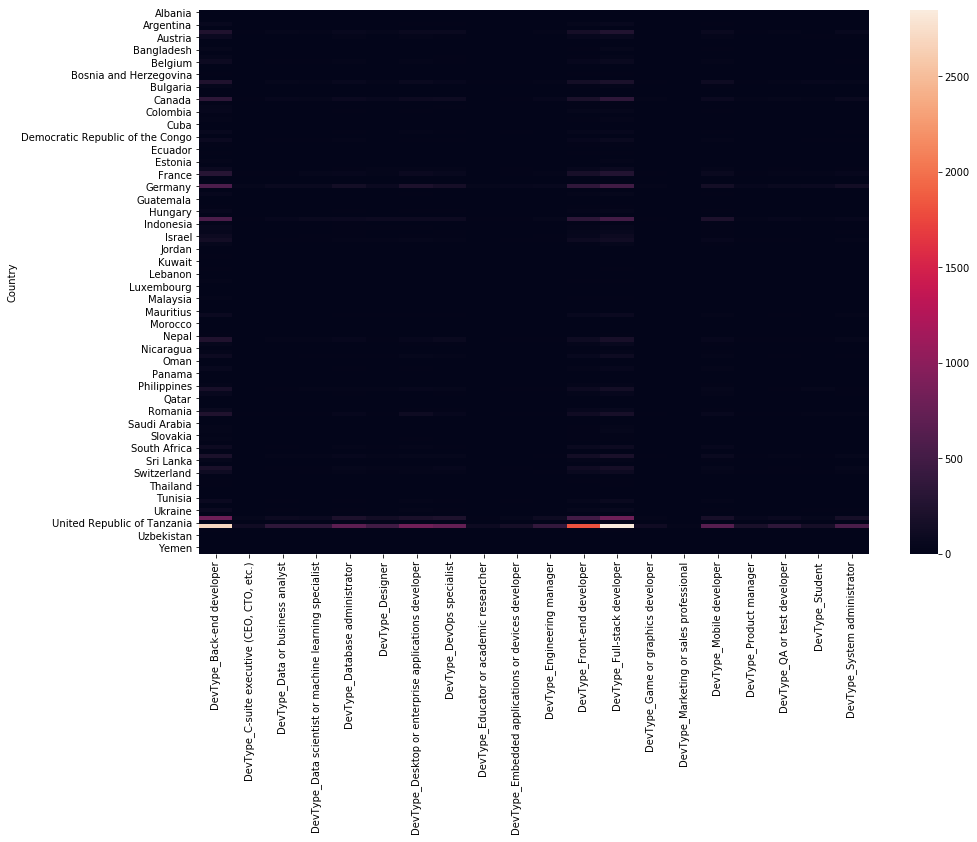

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc, ax=ax)

In [26]:
gb_df_dc.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,
Albania,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Algeria,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Andorra,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,66.0,3.0,8.0,5.0,11.0,8.0,15.0,12.0,5.0,4.0,10.0,41.0,65.0,3.0,0.0,19.0,5.0,5.0,11.0,11.0
Armenia,9.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0


In [27]:
# https://stackoverflow.com/questions/20069009/pandas-get-topmost-n-records-within-each-group
gb_df_dc2 = df_dc.groupby(df_dc['Country']).sum()
#df.groupby('id').head(2)
gb_df_dc2.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,
Albania,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Algeria,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Andorra,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,66.0,3.0,8.0,5.0,11.0,8.0,15.0,12.0,5.0,4.0,10.0,41.0,65.0,3.0,0.0,19.0,5.0,5.0,11.0,11.0
Armenia,9.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0


In [28]:
#gb_df_dc2['Albania']
#gb_df_dc2['DevType_Back-end developer']

# Checking a few countries

In [29]:
#fig, ax = plt.subplots(figsize=(15, 10))
#sns.heatmap(gb_df_dc[gb_df_dc['Albania']], ax=ax)
gb_df_dc2.head()
gb_df_dc2.loc[['Albania','China','France','Germany','Hong Kong (S.A.R.)','United States']]

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,
Albania,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
China,42.0,0.0,6.0,9.0,6.0,9.0,8.0,12.0,1.0,2.0,4.0,18.0,21.0,4.0,0.0,5.0,3.0,6.0,5.0,7.0
France,291.0,21.0,18.0,37.0,51.0,29.0,79.0,57.0,5.0,14.0,29.0,180.0,265.0,13.0,4.0,69.0,18.0,24.0,27.0,47.0
Germany,575.0,36.0,75.0,70.0,151.0,88.0,219.0,164.0,42.0,51.0,63.0,359.0,480.0,24.0,7.0,146.0,51.0,76.0,80.0,139.0
Hong Kong (S.A.R.),22.0,3.0,3.0,5.0,5.0,3.0,3.0,5.0,3.0,1.0,2.0,13.0,18.0,2.0,1.0,8.0,4.0,3.0,2.0,6.0
United States,2694.0,116.0,351.0,350.0,680.0,480.0,818.0,728.0,93.0,160.0,389.0,1822.0,2847.0,117.0,32.0,641.0,196.0,353.0,160.0,550.0


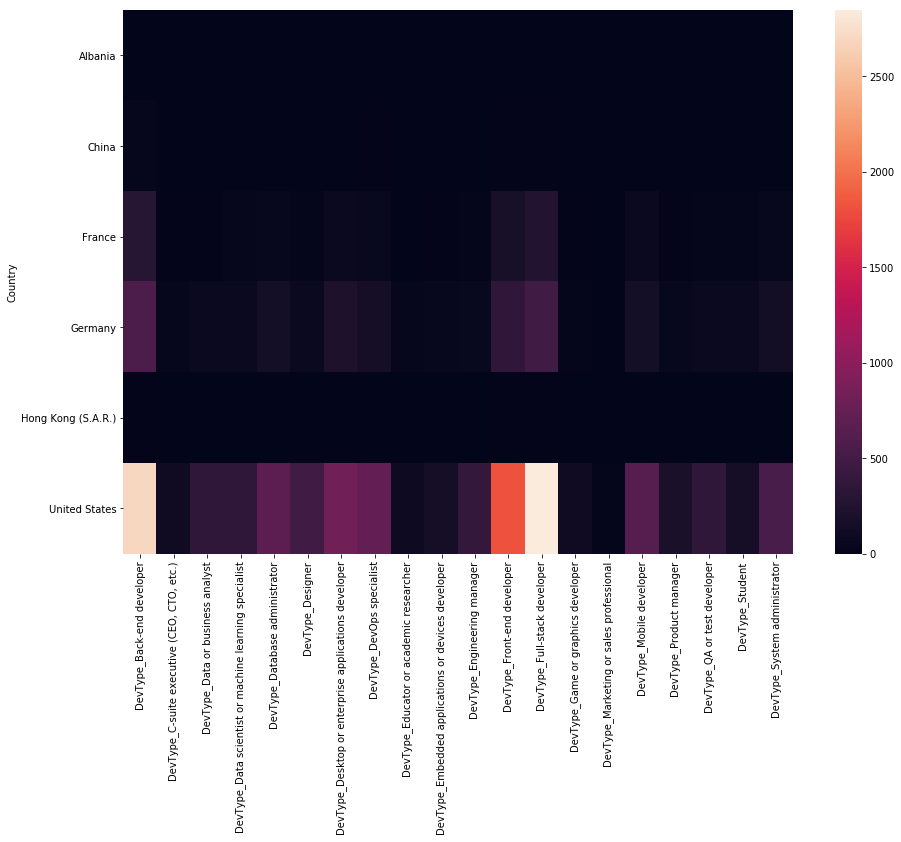

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc2.loc[['Albania','China','France','Germany','Hong Kong (S.A.R.)','United States']], ax=ax)

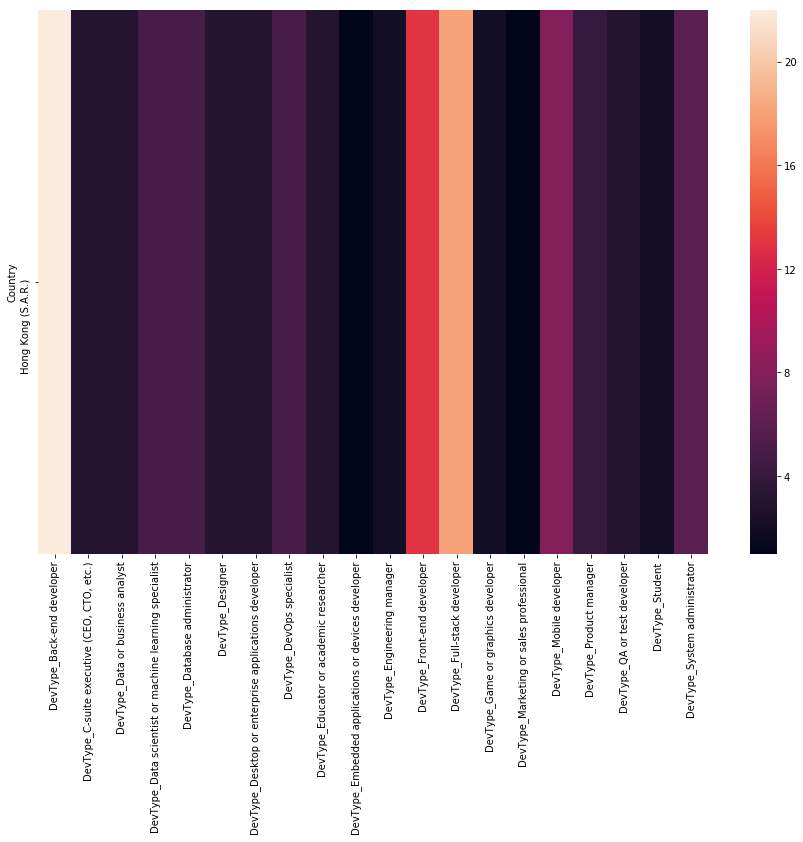

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc2.loc[['Hong Kong (S.A.R.)']], ax=ax)

In [32]:
# Checking Albania as one example.

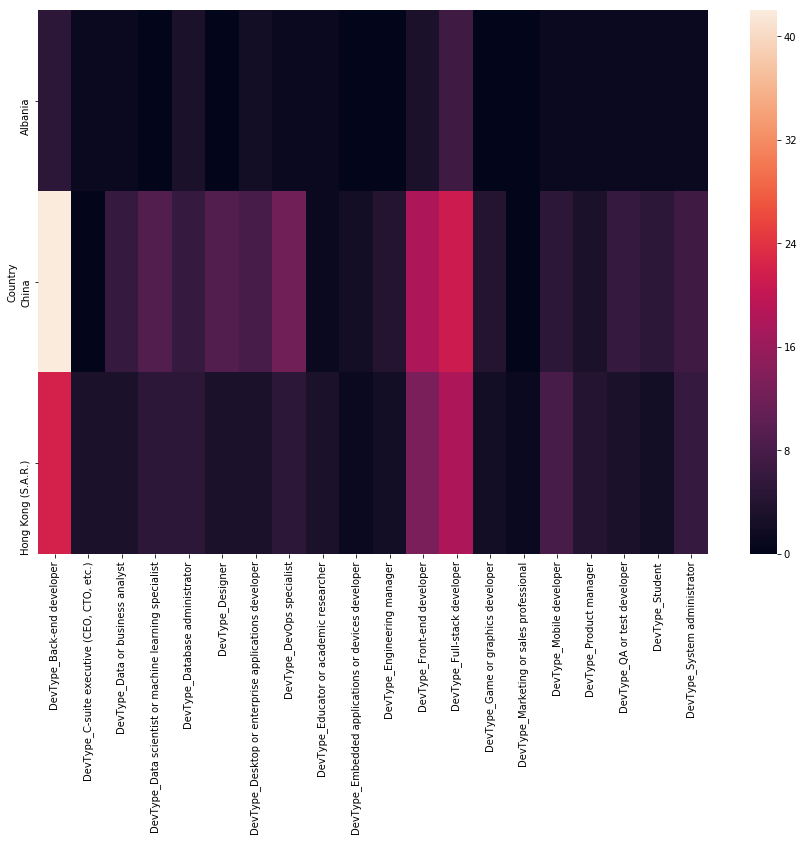

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc2.loc[['Albania','China','Hong Kong (S.A.R.)']], ax=ax)

# 4. Looks like Back-end Developer, Front-End, and Full-Stack are the 3 most common dev types per country.

# Best (highest) paid developers per country?

## Concat the data

In [34]:
# create dummies for 

In [35]:
#smaller_data = pd.concat([emp_dummies,formal_dummies],axis=1,sort=False)

# SALARY VS DevType
df_sal_dt = pd.concat([reduced_df['ConvertedSalary'],dt_dummies],axis=1)
df_sal_dt.head(10)

,ConvertedSalary,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,70841.0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,120000.0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,250000.0,1,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
3,420.0,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,30000.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,80000.0,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
6,6576.0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
7,115000.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,73428.0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
9,13212.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [36]:
df_sal_dt.tail(10)

,ConvertedSalary,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
13850,170000.0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
13851,73428.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13852,276.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
13853,6000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13854,30597.0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
13855,111963.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13856,21228.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13857,52872.0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
13858,36720.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13859,165000.0,1,1,0,1,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0


In [37]:
df_sal_dt.shape

(13860, 21)

In [129]:
df_sal_dt.sum(axis=0)[0]

1528881699.0

In [57]:
df_sal_dt['ConvertedSalary'].iloc[0]

70841.0

In [ ]:
developer_count['DevType_Back-end developer']

In [78]:
# summary for each developer type
# found out that each one is broken into 
developer_count = {}
developer_salary = {}
count = 0

for column_name,column_data in df_sal_dt.items():
    #print("COL NAME:", column_name,"(data below)\n", column_data)
    #break
    ###print("COLUMN DATA:\n", column_data)
    #print("COLUMN DATA[0]:\n", column_data[0]) # get the row in each column
    #print("COLUMN DATA[1]:\n", column_data[1]) # get the row in each column
    
    #print(len(column_data)) # proved this has the full column
    
    if column_name not in developer_count:
        developer_count[column_name] = 0
        developer_salary[column_name] = 0
    
    for row in range(len(column_data)):
        #print("ROW?",column_data[row])
        #print("column name:", column_name)
        #print("CE", col_element)
        #break
        if column_data[row] == 1:
            developer_count[column_name] += 1
            developer_salary[column_name] += df_sal_dt['ConvertedSalary'].iloc[row]
            #print("SALARY:",df_sal_dt['ConvertedSalary'].iloc[row])

### DEBUG CODE
#     count += 1
#     if count > 3:
#         break

In [79]:
developer_count

{'ConvertedSalary': 0,
 'DevType_Back-end developer': 9539,
 'DevType_C-suite executive (CEO, CTO, etc.)': 451,
 'DevType_Data or business analyst': 1138,
 'DevType_Data scientist or machine learning specialist': 1128,
 'DevType_Database administrator': 2230,
 'DevType_Designer': 1458,
 'DevType_Desktop or enterprise applications developer': 2698,
 'DevType_DevOps specialist': 2327,
 'DevType_Educator or academic researcher': 395,
 'DevType_Embedded applications or devices developer': 595,
 'DevType_Engineering manager': 1092,
 'DevType_Front-end developer': 5947,
 'DevType_Full-stack developer': 9026,
 'DevType_Game or graphics developer': 426,
 'DevType_Marketing or sales professional': 95,
 'DevType_Mobile developer': 2669,
 'DevType_Product manager': 695,
 'DevType_QA or test developer': 1072,
 'DevType_Student': 780,
 'DevType_System administrator': 1760}

In [80]:
developer_salary['DevType_Back-end developer']

1028794025.0

In [81]:
developer_count['DevType_Back-end developer']

9539

In [82]:
developer_salary['DevType_C-suite executive (CEO, CTO, etc.)']

60011428.0

In [83]:
developer_count['DevType_C-suite executive (CEO, CTO, etc.)']

451

In [93]:
developer_count

{'ConvertedSalary': 0,
 'DevType_Back-end developer': 9539,
 'DevType_C-suite executive (CEO, CTO, etc.)': 451,
 'DevType_Data or business analyst': 1138,
 'DevType_Data scientist or machine learning specialist': 1128,
 'DevType_Database administrator': 2230,
 'DevType_Designer': 1458,
 'DevType_Desktop or enterprise applications developer': 2698,
 'DevType_DevOps specialist': 2327,
 'DevType_Educator or academic researcher': 395,
 'DevType_Embedded applications or devices developer': 595,
 'DevType_Engineering manager': 1092,
 'DevType_Front-end developer': 5947,
 'DevType_Full-stack developer': 9026,
 'DevType_Game or graphics developer': 426,
 'DevType_Marketing or sales professional': 95,
 'DevType_Mobile developer': 2669,
 'DevType_Product manager': 695,
 'DevType_QA or test developer': 1072,
 'DevType_Student': 780,
 'DevType_System administrator': 1760}

## DEVELOPER AVERAGES

In [94]:
developer_average_salary = {}

for key,value in developer_count.items():
    #print(key)
    try:
        developer_average_salary[key] = developer_salary[key]/developer_count[key]
    except:
        pass

# for x in zip(developer_average_salary,developer_average_salary)
# = developer_salary/developer_count

In [92]:
developer_average_salary

{'DevType_Back-end developer': 107851.3497221931,
 'DevType_C-suite executive (CEO, CTO, etc.)': 133063.0332594235,
 'DevType_Data or business analyst': 122489.8848857645,
 'DevType_Data scientist or machine learning specialist': 120145.71631205674,
 'DevType_Database administrator': 106291.74529147982,
 'DevType_Designer': 105317.94170096022,
 'DevType_Desktop or enterprise applications developer': 109202.10340993329,
 'DevType_DevOps specialist': 120235.644177052,
 'DevType_Educator or academic researcher': 103480.41012658228,
 'DevType_Embedded applications or devices developer': 101268.57647058823,
 'DevType_Engineering manager': 135965.75824175825,
 'DevType_Front-end developer': 108692.25643181436,
 'DevType_Full-stack developer': 111729.80157323288,
 'DevType_Game or graphics developer': 101167.4131455399,
 'DevType_Marketing or sales professional': 105973.84210526316,
 'DevType_Mobile developer': 93761.91007868115,
 'DevType_Product manager': 121370.77122302158,
 'DevType_QA or

In [136]:
#df['class'].value_counts().plot('bar')
df_dev_avg = pd.DataFrame.from_dict(developer_average_salary,orient='index')
df_dev_avg

,0
DevType_Back-end developer,107851.349722
"DevType_C-suite executive (CEO, CTO, etc.)",133063.033259
DevType_Data or business analyst,122489.884886
DevType_Data scientist or machine learning specialist,120145.716312
DevType_Database administrator,106291.745291
DevType_Designer,105317.941701
DevType_Desktop or enterprise applications developer,109202.103410
DevType_DevOps specialist,120235.644177
DevType_Educator or academic researcher,103480.410127
DevType_Embedded applications or devices developer,101268.576471


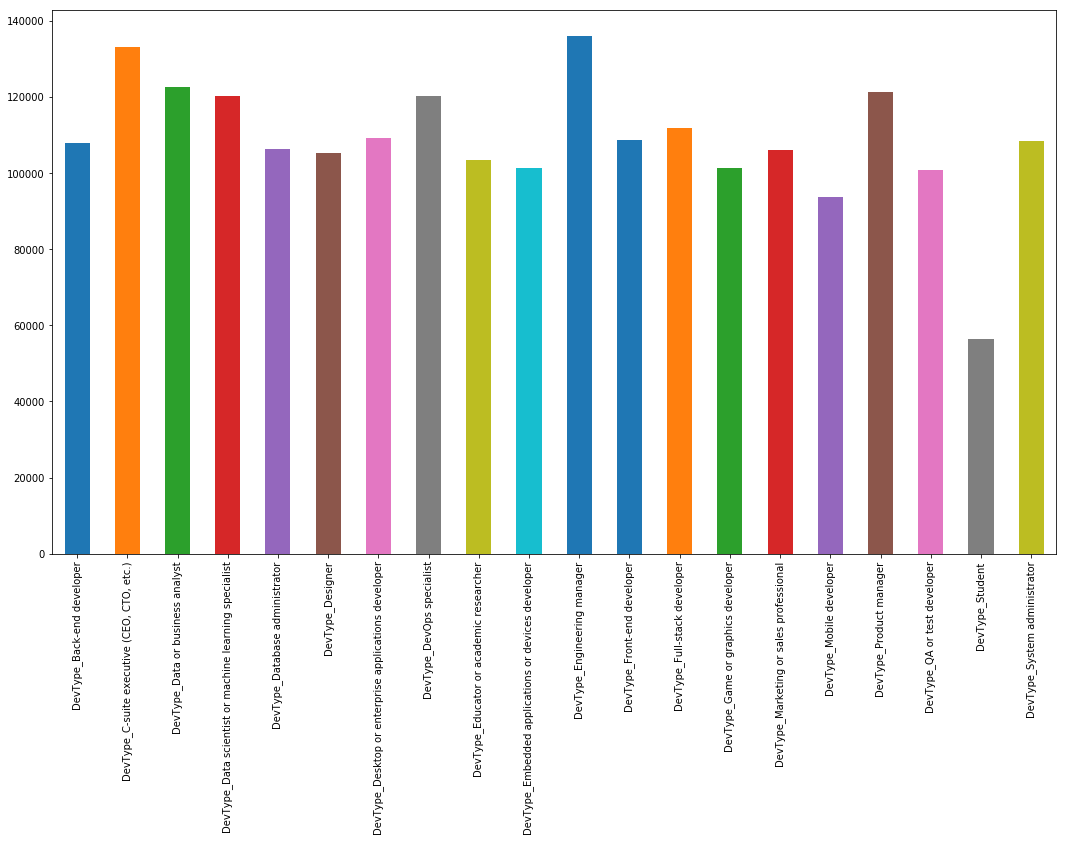

In [162]:
df_dev_avg[0].plot('bar',figsize=(18, 10))

# 4. In the reduced data set, using the average salary per category, C-suite executive, Engineering Manager, and Data or Business Analyst had the highest average salary over all the countries polled.

# Top 3 salaries per country

In [147]:
# top 3 salaries per country
df_cy_cs.groupby(['Country']).apply(lambda grp: grp.nlargest(3, 'ConvertedSalary'))

Country  \
Country                                                                            
Albania                              5391                                Albania   
                                     3658                                Albania   
                                     7585                                Albania   
Algeria                              9361                                Algeria   
                                     7214                                Algeria   
                                     11057                               Algeria   
Andorra                              7871                                Andorra   
Argentina                            13140                             Argentina   
                                     4526                              Argentina   
                                     12048                             Argentina   
Armenia                              1095                                Armenia   
                                     10652                               Armenia   
                                     12753                               Armenia   
Australia                            276                               Australia   
                                     2599                              Australia   
                                     2751                              Australia   
Austria                              8007                                Austria   
                                     2082                                Austria   
                                     7602                                Austria   
Azerbaijan                           12670                            Azerbaijan   
                                     2206                             Azerbaijan   
                                     4794                             Azerbaijan   
Bahrain                              2461                                Bahrain   
                                     945                                 Bahrain   
Bangladesh                           2111                             Bangladesh   
                                     5200                             Bangladesh   
                                     7841                             Bangladesh   
Barbados                             13632                              Barbados   
Belarus                              10254                               Belarus   
                                     13091                               Belarus   
...                                                                          ...   
Uganda                               12581                                Uganda   
Ukraine                              6700                                Ukraine   
                                     11183                               Ukraine   
                                     4550                                Ukraine   
United Arab Emirates                 1864                   United Arab Emirates   
                                     2063                   United Arab Emirates   
                                     6011                   United Arab Emirates   
United Kingdom                       6037                         United Kingdom   
                                     965                          United Kingdom   
                                     1558                         United Kingdom   
United Republic of Tanzania          3841            United Republic of Tanzania   
                                     10215           United Republic of Tanzania   
United States                        84                            United States   
                                     102                           United States   
                                     267                           United States   
Uruguay                              3123

In [148]:
highest_paid = df_cy_cs.groupby(['Country']).apply(lambda grp: grp.nlargest(3, 'ConvertedSalary'))

In [149]:
highest_paid.isna().sum()

Country                                                  0
ConvertedSalary                                          0
DevType_Back-end developer                               0
DevType_C-suite executive (CEO, CTO, etc.)               0
DevType_Data or business analyst                         0
DevType_Data scientist or machine learning specialist    0
DevType_Database administrator                           0
DevType_Designer                                         0
DevType_Desktop or enterprise applications developer     0
DevType_DevOps specialist                                0
DevType_Educator or academic researcher                  0
DevType_Embedded applications or devices developer       0
DevType_Engineering manager                              0
DevType_Front-end developer                              0
DevType_Full-stack developer                             0
DevType_Game or graphics developer                       0
DevType_Marketing or sales professional                 

# Histogram of devtypes from the data subset

In [150]:
#highest_paid.plot(kind='bar', figsize=(12, 6))
#df['colour'].value_counts().plot(kind='bar')
highest_paid['DevType_Back-end developer'].value_counts()[1]

244

In [151]:
highest_paid['DevType_C-suite executive (CEO, CTO, etc.)'].value_counts()[1]

27

In [152]:
highest_paid['DevType_C-suite executive (CEO, CTO, etc.)'].value_counts()[1]

27

## Count of highest paid developers per country

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


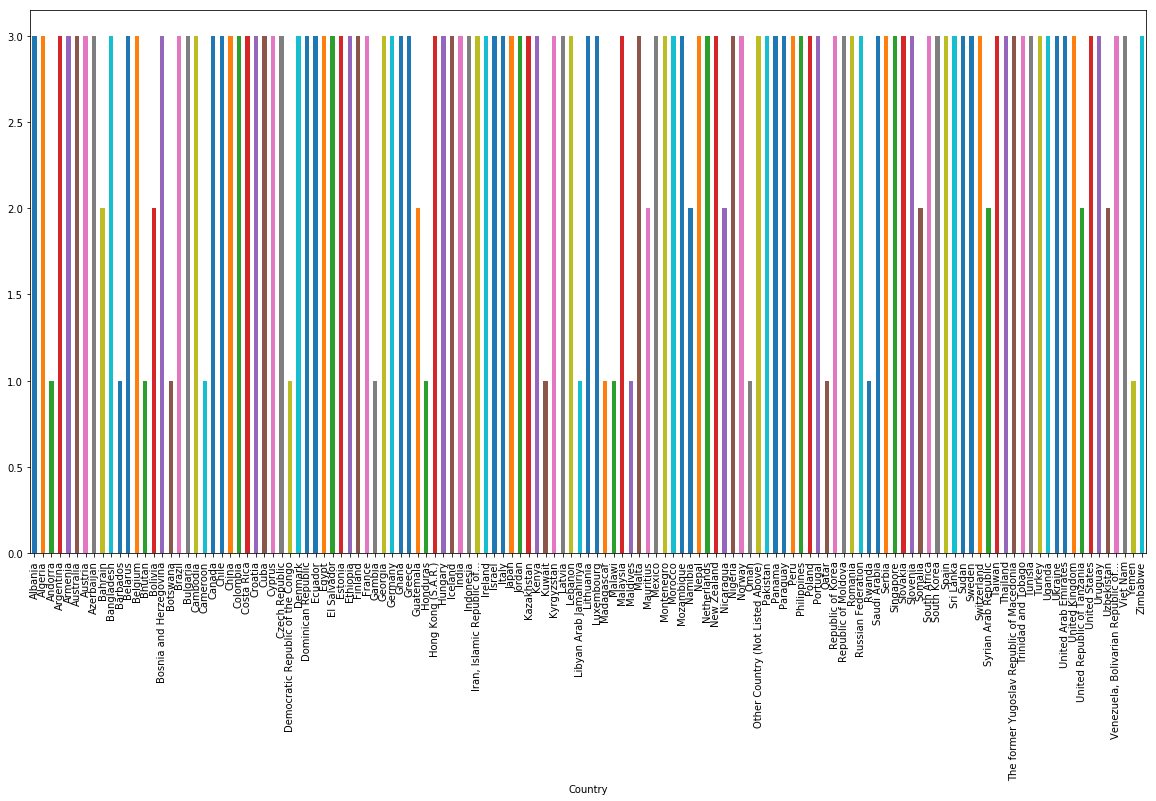

In [153]:
highest_paid.groupby('Country').size().plot(kind='bar',figsize=(20, 10))

In [154]:
#highest_paid.groupby('Country')['Albania'].size().plot(kind='bar',figsize=(15, 10))

highest_paid.groupby('Country').get_group('Albania')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'Country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


Country  ConvertedSalary  DevType_Back-end developer  \
Country                                                              
Albania 5391  Albania          40000.0                           1   
        3658  Albania          35244.0                           0   
        7585  Albania          24000.0                           1   

              DevType_C-suite executive (CEO, CTO, etc.)  \
Country                                                    
Albania 5391                                           0   
        3658                                           0   
        7585                                           1   

              DevType_Data or business analyst  \
Country                                          
Albania 5391                                 0   
        3658                                 0   
        7585                                 0   

              DevType_Data scientist or machine learning specialist  \
Country                                                               
Albania 5391                                                  0       
        3658                                                  0       
        7585                                                  0       

              DevType_Database administrator  DevType_Designer  \
Country                                                          
Albania 5391                               0                 0   
        3658                               0                 0   
        7585                               0                 0   

              DevType_Desktop or enterprise applications developer  \
Country                                                              
Albania 5391                                                  0      
        3658                                                  0      
        7585                                                  0      

              DevType_DevOps specialist              ...               \
Country                                              ...                
Albania 5391                          0              ...                
        3658                          0              ...                
        7585                          0              ...                

              DevType_Engineering manager  DevType_Front-end developer  \
Country                                                                  
Albania 5391                            0                            0   
        3658                            0                            0   
        7585                            0                            0   

              DevType_Full-stack developer  \
Country                                      
Albania 5391                             1   
        3658                             1   
        7585                             1   

              DevType_Game or graphics developer  \
Country                                            
Albania 5391                                   0   
        3658                                   0   
        7585                                   0   

              DevType_Marketing or sales professional  \
Country                                                 
Albania 5391                                        0   
        3658                                        0   
        7585                                        0   

              DevType_Mobile developer  DevType_Product manager  \
Country                                                           
Albania 5391                         0                        0   
        3658                         0                        0   
        7585                         1                        0   

              DevType_QA or test developer  DevType_Student  \
Country                                                       
Albania 5391                             0                0   
        3658                     

In [155]:
#highest_paid.groupby('Country').get_group('Albania').plot(kind='bar',figsize=(15, 10))

In [156]:
highest_paid.columns

Index(['Country', 'ConvertedSalary', 'DevType_Back-end developer',
       'DevType_C-suite executive (CEO, CTO, etc.)',
       'DevType_Data or business analyst',
       'DevType_Data scientist or machine learning specialist',
       'DevType_Database administrator', 'DevType_Designer',
       'DevType_Desktop or enterprise applications developer',
       'DevType_DevOps specialist', 'DevType_Educator or academic researcher',
       'DevType_Embedded applications or devices developer',
       'DevType_Engineering manager', 'DevType_Front-end developer',
       'DevType_Full-stack developer', 'DevType_Game or graphics developer',
       'DevType_Marketing or sales professional', 'DevType_Mobile developer',
       'DevType_Product manager', 'DevType_QA or test developer',
       'DevType_Student', 'DevType_System administrator'],
      dtype='object')

In [157]:
subset = ['DevType_Back-end developer','DevType_C-suite executive (CEO, CTO, etc.)','DevType_Data or business analyst','DevType_Data scientist or machine learning specialist','DevType_Database administrator', 'DevType_Designer','DevType_Desktop or enterprise applications developer','DevType_DevOps specialist', 'DevType_Educator or academic researcher','DevType_Embedded applications or devices developer','DevType_Engineering manager', 'DevType_Front-end developer','DevType_Full-stack developer', 'DevType_Game or graphics developer','DevType_Marketing or sales professional', 'DevType_Mobile developer','DevType_Product manager', 'DevType_QA or test developer','DevType_Student', 'DevType_System administrator']

In [158]:
highest_paid[subset].head()

DevType_Back-end developer  \
Country                                    
Albania 5391                           1   
        3658                           0   
        7585                           1   
Algeria 9361                           1   
        7214                           0   

              DevType_C-suite executive (CEO, CTO, etc.)  \
Country                                                    
Albania 5391                                           0   
        3658                                           0   
        7585                                           1   
Algeria 9361                                           0   
        7214                                           0   

              DevType_Data or business analyst  \
Country                                          
Albania 5391                                 0   
        3658                                 0   
        7585                                 0   
Algeria 9361                                 0   
        7214                                 0   

              DevType_Data scientist or machine learning specialist  \
Country                                                               
Albania 5391                                                  0       
        3658                                                  0       
        7585                                                  0       
Algeria 9361                                                  0       
        7214                                                  0       

              DevType_Database administrator  DevType_Designer  \
Country                                                          
Albania 5391                               0                 0   
        3658                               0                 0   
        7585                               0                 0   
Algeria 9361                               0                 1   
        7214                               0                 0   

              DevType_Desktop or enterprise applications developer  \
Country                                                              
Albania 5391                                                  0      
        3658                                                  0      
        7585                                                  0      
Algeria 9361                                                  0      
        7214                                                  0      

              DevType_DevOps specialist  \
Country                                   
Albania 5391                          0   
        3658                          0   
        7585                          0   
Algeria 9361                          0   
        7214                          0   

              DevType_Educator or academic researcher  \
Country                                                 
Albania 5391                                        0   
        3658                                        0   
        7585                                        0   
Algeria 9361                                        0   
        7214                                        0   

              DevType_Embedded applications or devices developer  \
Country                                                            
Albania 5391                                                  0    
        3658                                                  0    
        7585                                                  0    
Algeria 9361                                                  0    
        7214                                                  0    

              DevType_Engineering manager  DevType_Front-end developer  \
Country                                                                  
Albania 5391                            0                            0   
        3658                            0                            0   
      

In [159]:
highest_paid[subset].sum()

DevType_Back-end developer                               244
DevType_C-suite executive (CEO, CTO, etc.)                27
DevType_Data or business analyst                          43
DevType_Data scientist or machine learning specialist     33
DevType_Database administrator                            61
DevType_Designer                                          39
DevType_Desktop or enterprise applications developer      71
DevType_DevOps specialist                                 51
DevType_Educator or academic researcher                   14
DevType_Embedded applications or devices developer        14
DevType_Engineering manager                               41
DevType_Front-end developer                              141
DevType_Full-stack developer                             222
DevType_Game or graphics developer                        15
DevType_Marketing or sales professional                    3
DevType_Mobile developer                                  64
DevType_Product manager 

# 4. Highest paid developers worldwide (Using top 3 per country and getting the final count of these developers per category)

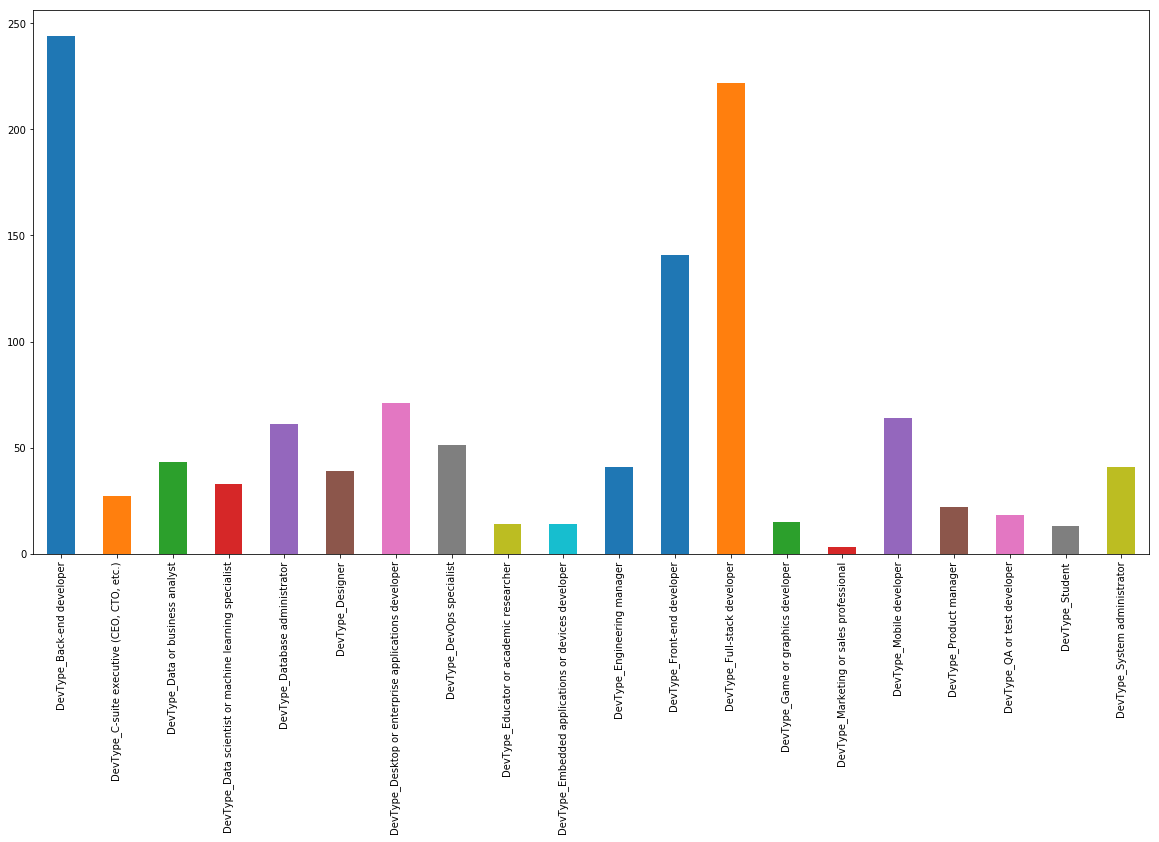

In [160]:
highest_paid[subset].sum().plot(kind='bar',figsize=(20, 10))

# 4. Which are the top-three the most common dev types per country? And which are the best paid ones?

In [161]:
highest_paid

Country  \
Country                                                                            
Albania                              5391                                Albania   
                                     3658                                Albania   
                                     7585                                Albania   
Algeria                              9361                                Algeria   
                                     7214                                Algeria   
                                     11057                               Algeria   
Andorra                              7871                                Andorra   
Argentina                            13140                             Argentina   
                                     4526                              Argentina   
                                     12048                             Argentina   
Armenia                              1095                                Armenia   
                                     10652                               Armenia   
                                     12753                               Armenia   
Australia                            276                               Australia   
                                     2599                              Australia   
                                     2751                              Australia   
Austria                              8007                                Austria   
                                     2082                                Austria   
                                     7602                                Austria   
Azerbaijan                           12670                            Azerbaijan   
                                     2206                             Azerbaijan   
                                     4794                             Azerbaijan   
Bahrain                              2461                                Bahrain   
                                     945                                 Bahrain   
Bangladesh                           2111                             Bangladesh   
                                     5200                             Bangladesh   
                                     7841                             Bangladesh   
Barbados                             13632                              Barbados   
Belarus                              10254                               Belarus   
                                     13091                               Belarus   
...                                                                          ...   
Uganda                               12581                                Uganda   
Ukraine                              6700                                Ukraine   
                                     11183                               Ukraine   
                                     4550                                Ukraine   
United Arab Emirates                 1864                   United Arab Emirates   
                                     2063                   United Arab Emirates   
                                     6011                   United Arab Emirates   
United Kingdom                       6037                         United Kingdom   
                                     965                          United Kingdom   
                                     1558                         United Kingdom   
United Republic of Tanzania          3841            United Republic of Tanzania   
                                     10215           United Republic of Tanzania   
United States                        84                            United States   
                                     102                           United States   
                                     267                           United States   
Uruguay                              3123